# 🎯 Tu Primer Grafo con LangGraph: Sistema de Clasificación de Tickets

**Módulo 1: Fundamentos de LangGraph**  
**Tiempo estimado**: 30 minutos  
**Nivel**: Principiante

---

## 📋 Objetivos de Aprendizaje

Al finalizar este notebook, podrás:

1. ✅ Entender qué es un **State** y cómo se utiliza
2. ✅ Crear **Nodes** (nodos) como funciones de Python
3. ✅ Conectar nodos con **Edges** (aristas) normales
4. ✅ Implementar **Conditional Edges** para routing dinámico
5. ✅ Construir y ejecutar un grafo completo
6. ✅ Visualizar el flujo de ejecución

---

## 🎬 Caso de Uso: Sistema de Clasificación de Tickets de Soporte

Imagina que trabajas en un equipo de soporte técnico que recibe cientos de tickets diarios. Necesitas un sistema automatizado que:

1. **Reciba** el ticket del usuario
2. **Clasifique** el ticket según su prioridad (urgente vs normal)
3. **Procese** el ticket según su clasificación:
   - Tickets urgentes → Escalado inmediato
   - Tickets normales → Cola estándar

Este es el flujo que vamos a construir:

```
START → Recibir Ticket → Clasificar Prioridad → [Urgente / Normal] → END
```

---

## 🏗️ Arquitectura del Sistema

Nuestro grafo tendrá:

- **3 Nodos**: `recibir_ticket`, `procesar_urgente`, `procesar_normal`
- **1 Conditional Edge**: Decide si el ticket es urgente o normal
- **1 State**: Mantiene la información del ticket a través del flujo

![Diagrama del flujo](https://via.placeholder.com/600x300?text=Ticket+Classification+Flow)

## 📦 Setup Inicial

Primero, instalamos e importamos las dependencias necesarias.

In [19]:
# Instalación (ejecutar solo una vez)
# %pip install --quiet -U langgraph

# Verificar instalación
import langgraph


AttributeError: module 'langgraph' has no attribute '_version_'

In [3]:
# Importaciones necesarias
from typing_extensions import TypedDict
from typing import Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

print("✅ Importaciones completadas")

✅ Importaciones completadas


---

## 🗂️ PASO 1: Definir el State (Estado)

### ¿Qué es el State?

El **State** es como una "pizarra compartida" donde todos los nodos pueden:
- ✅ **Leer** información
- ✅ **Escribir** información
- ✅ **Actualizar** información existente

Piensa en el State como un diccionario de Python que viaja a través de todo el grafo.

### 💡 ¿Por qué usar TypedDict?

`TypedDict` nos permite:
- Definir qué claves puede tener nuestro estado
- Especificar el tipo de dato de cada clave
- Obtener autocompletado en el IDE
- Detectar errores antes de ejecutar

### 🎯 Nuestro State para Tickets

Para nuestro sistema de tickets, necesitamos almacenar:
- `ticket_id`: ID único del ticket
- `mensaje`: El mensaje del usuario
- `prioridad`: Si es urgente o normal
- `estado`: Estado actual del procesamiento
- `asignado_a`: A quién se asignó el ticket

In [4]:
# 💬 SCRIPT INSTRUCTOR:
# "Vamos a definir nuestro State. Es como definir los campos de una base de datos,
#  pero este diccionario viajará a través de todos los nodos del grafo."

class TicketState(TypedDict):
    """Estado que representa un ticket de soporte a través del flujo."""
    
    ticket_id: str        # ID único del ticket
    mensaje: str          # Mensaje original del usuario
    prioridad: str        # "urgente" o "normal"
    estado: str           # "recibido", "clasificado", "procesado"
    asignado_a: str       # Equipo o persona asignada

# 🧪 DEMO: Crear un ejemplo de estado
ejemplo_estado = {
    "ticket_id": "TICKET-001",
    "mensaje": "El servidor está caído",
    "prioridad": "",
    "estado": "recibido",
    "asignado_a": ""
}

print("📝 Ejemplo de State inicial:")
print(ejemplo_estado)

📝 Ejemplo de State inicial:
{'ticket_id': 'TICKET-001', 'mensaje': 'El servidor está caído', 'prioridad': '', 'estado': 'recibido', 'asignado_a': ''}


### 🧪 EXPERIMENTO 1: Jugando con el State

Modifica el diccionario `ejemplo_estado` arriba y observa cómo cambia:

**Prueba estos cambios:**
1. Cambia el mensaje a "No puedo acceder a mi cuenta"
2. Cambia el ticket_id a "TICKET-999"
3. Agrega una nueva clave `categoria: "login"`

❓ **PREGUNTA:** ¿Qué pasa si agregas una clave que no está en TypedDict?

---

## ⚙️ PASO 2: Crear los Nodes (Nodos)

### ¿Qué es un Node?

Un **Node** es simplemente una función de Python que:
- ✅ Recibe el **State** como entrada
- ✅ Hace algún procesamiento
- ✅ Retorna un diccionario con valores **actualizados** del State

### 🔄 ¿Cómo se actualiza el State?

**Comportamiento por defecto**: Los valores que retornas **sobrescriben** los valores existentes.

```python
# Si el state tiene: {"contador": 5}
def incrementar(state):
    return {"contador": 10}  # Sobrescribe a 10
```

### 🎯 Nuestros 3 Nodos

Vamos a crear:
1. **recibir_ticket**: Recibe y registra el ticket
2. **procesar_urgente**: Maneja tickets urgentes
3. **procesar_normal**: Maneja tickets normales

In [5]:
# 💬 SCRIPT INSTRUCTOR:
# "El primer nodo recibe el ticket y lo marca como 'clasificado'.
#  Fíjense cómo recibe el state completo y retorna solo los campos que quiere actualizar."

def recibir_ticket(state: TicketState) -> dict:
    """
    Nodo 1: Recibe el ticket y lo prepara para clasificación.
    
    Args:
        state: Estado actual del ticket
        
    Returns:
        Dict con campos actualizados del state
    """
    print(f"\n📨 NODO 1: Recibiendo ticket {state['ticket_id']}")
    print(f"   Mensaje: '{state['mensaje']}'")
    
    # Actualizar el estado a "clasificado"
    return {
        "estado": "clasificado"
    }

# 🧪 DEMO: Probar el nodo individualmente
print("🎬 Demo del nodo recibir_ticket:")
resultado = recibir_ticket(ejemplo_estado)
print(f"\n✅ El nodo retorna: {resultado}")
print(f"💡 Esto actualizará el campo 'estado' en el State")

🎬 Demo del nodo recibir_ticket:

📨 NODO 1: Recibiendo ticket TICKET-001
   Mensaje: 'El servidor está caído'

✅ El nodo retorna: {'estado': 'clasificado'}
💡 Esto actualizará el campo 'estado' en el State


In [6]:
# 💬 SCRIPT INSTRUCTOR:
# "Este nodo maneja tickets URGENTES. Los escala al equipo de ingeniería."

def procesar_urgente(state: TicketState) -> dict:
    """
    Nodo 2: Procesa tickets urgentes con alta prioridad.
    """
    print(f"\n🚨 NODO 2: Procesando ticket URGENTE {state['ticket_id']}")
    print(f"   ⚡ Escalando al equipo de ingeniería...")
    
    return {
        "estado": "procesado",
        "asignado_a": "Equipo de Ingeniería",
        "prioridad": "urgente"
    }

# 🧪 DEMO
print("🎬 Demo del nodo procesar_urgente:")
estado_urgente = {**ejemplo_estado, "prioridad": "urgente"}
resultado = procesar_urgente(estado_urgente)
print(f"\n✅ Retorna: {resultado}")

🎬 Demo del nodo procesar_urgente:

🚨 NODO 2: Procesando ticket URGENTE TICKET-001
   ⚡ Escalando al equipo de ingeniería...

✅ Retorna: {'estado': 'procesado', 'asignado_a': 'Equipo de Ingeniería', 'prioridad': 'urgente'}


In [7]:
# 💬 SCRIPT INSTRUCTOR:
# "Este nodo maneja tickets NORMALES. Van a la cola estándar de soporte."

def procesar_normal(state: TicketState) -> dict:
    """
    Nodo 3: Procesa tickets con prioridad normal.
    """
    print(f"\n📋 NODO 3: Procesando ticket NORMAL {state['ticket_id']}")
    print(f"   📌 Agregando a cola de soporte estándar...")
    
    return {
        "estado": "procesado",
        "asignado_a": "Equipo de Soporte L1",
        "prioridad": "normal"
    }

# 🧪 DEMO
print("🎬 Demo del nodo procesar_normal:")
estado_normal = {**ejemplo_estado, "prioridad": "normal"}
resultado = procesar_normal(estado_normal)
print(f"\n✅ Retorna: {resultado}")

🎬 Demo del nodo procesar_normal:

📋 NODO 3: Procesando ticket NORMAL TICKET-001
   📌 Agregando a cola de soporte estándar...

✅ Retorna: {'estado': 'procesado', 'asignado_a': 'Equipo de Soporte L1', 'prioridad': 'normal'}


### 🧪 EXPERIMENTO 2: Modificando Nodos

**Desafío**: Modifica el nodo `procesar_urgente` para que también:
1. Agregue un campo `tiempo_respuesta: "inmediato"`
2. Imprima un mensaje adicional con el tiempo estimado de respuesta

**Pista**: Solo necesitas agregar campos al diccionario que retorna.

❓ **PREGUNTA:** ¿Qué pasa si un nodo no retorna nada? ¿Se actualiza el State?

---

## 🔀 PASO 3: Crear el Conditional Edge (Routing Dinámico)

### ¿Qué es un Conditional Edge?

Un **Conditional Edge** es una función que **decide** a qué nodo ir siguiente basándose en el State.

### 🆚 Edges Normales vs Condicionales

| Tipo | Cuándo usar | Ejemplo |
|------|-------------|----------|
| **Normal Edge** | Siempre ir al mismo nodo | `A → B` (siempre) |
| **Conditional Edge** | Decidir dinámicamente | `A → [B o C]` (depende) |

### 🎯 Nuestra Lógica de Clasificación

Vamos a clasificar tickets como urgentes si contienen palabras clave como:
- "caído", "down", "error crítico", "urgente", "producción"

In [11]:
# 💬 SCRIPT INSTRUCTOR:
# "El Conditional Edge es como un 'if' que decide el camino.
#  Fíjense cómo retorna el NOMBRE del nodo al que queremos ir."

def clasificar_prioridad(state: TicketState) -> Literal["procesar_urgente", "procesar_normal"]:
    """
    Conditional Edge: Decide si el ticket es urgente o normal.
    
    Args:
        state: Estado actual del ticket
        
    Returns:
        Nombre del nodo siguiente ("procesar_urgente" o "procesar_normal")
    """
    mensaje_lower = state['mensaje'].lower()
    
    # Palabras clave que indican urgencia
    palabras_urgentes = [
        "caído", "down", "crítico", "urgente", 
        "producción", "error fatal", "no funciona"
    ]
    
    # Verificar si el mensaje contiene palabras urgentes
    es_urgente = any(palabra in mensaje_lower for palabra in palabras_urgentes)
    
    if es_urgente:
        print(f"\n⚠️  ROUTING: Ticket clasificado como URGENTE")
        print(f"   Razón: Contiene palabras clave de urgencia")
        return "procesar_urgente"
    else:
        print(f"\n✅ ROUTING: Ticket clasificado como NORMAL")
        print(f"   Razón: No contiene indicadores de urgencia")
        return "procesar_normal"

# 🧪 DEMO: Probar la clasificación con diferentes mensajes
print("🎬 Demo del Conditional Edge:\n")

mensajes_prueba = [
    "El servidor está caído",
    "Necesito cambiar mi contraseña",
    "Error crítico en producción",
    "¿Cómo actualizo mi perfil?"
]

for mensaje in mensajes_prueba:
    estado_prueba = {**ejemplo_estado, "mensaje": mensaje}
    destino = clasificar_prioridad(estado_prueba)
    print(f"\n   📨 '{mensaje}'")
    print(f"   → Destino: {destino}")
    print("   " + "-"*50)

🎬 Demo del Conditional Edge:


⚠️  ROUTING: Ticket clasificado como URGENTE
   Razón: Contiene palabras clave de urgencia

   📨 'El servidor está caído'
   → Destino: procesar_urgente
   --------------------------------------------------

✅ ROUTING: Ticket clasificado como NORMAL
   Razón: No contiene indicadores de urgencia

   📨 'Necesito cambiar mi contraseña'
   → Destino: procesar_normal
   --------------------------------------------------

⚠️  ROUTING: Ticket clasificado como URGENTE
   Razón: Contiene palabras clave de urgencia

   📨 'Error crítico en producción'
   → Destino: procesar_urgente
   --------------------------------------------------

✅ ROUTING: Ticket clasificado como NORMAL
   Razón: No contiene indicadores de urgencia

   📨 '¿Cómo actualizo mi perfil?'
   → Destino: procesar_normal
   --------------------------------------------------


### 🧪 EXPERIMENTO 3: Mejorando la Clasificación

**Desafío**: Agrega más palabras clave a la lista `palabras_urgentes`:
- "seguridad"
- "hackeo"
- "pérdida de datos"

Luego prueba con estos mensajes:
- "Detectamos un intento de hackeo"
- "Posible pérdida de datos en la base de datos"

❓ **PREGUNTA:** ¿Cómo podrías hacer que la clasificación sea más inteligente usando un LLM?

---

## 🏗️ PASO 4: Construir el Grafo Completo

### Proceso de Construcción

1. **Crear** un StateGraph con nuestro State
2. **Agregar** todos los nodos
3. **Conectar** los nodos con edges
4. **Compilar** el grafo
5. **Visualizar** el resultado

### 🔑 Nodos Especiales

- **START**: Punto de entrada del grafo (recibe el input inicial)
- **END**: Punto de salida del grafo (marca el final)

### 📐 Nuestra Arquitectura

```
START 
  ↓
recibir_ticket
  ↓
clasificar_prioridad (Conditional Edge)
  ↓               ↓
urgente        normal
  ↓               ↓
END            END
```

In [12]:
# 💬 SCRIPT INSTRUCTOR:
# "Ahora juntamos todas las piezas. Primero creamos el builder con nuestro State,
#  luego agregamos los nodos, y finalmente conectamos todo con edges."

# 1. Crear el builder
builder = StateGraph(TicketState)
print("✅ 1. StateGraph creado")

# 2. Agregar los nodos
builder.add_node("recibir_ticket", recibir_ticket)
builder.add_node("procesar_urgente", procesar_urgente)
builder.add_node("procesar_normal", procesar_normal)
print("✅ 2. Nodos agregados")

# 3. Conectar con edges
# START → recibir_ticket (edge normal, siempre va ahí)
builder.add_edge(START, "recibir_ticket")
print("✅ 3. Edge START → recibir_ticket")

# recibir_ticket → clasificar_prioridad → [urgente O normal] (conditional edge)
builder.add_conditional_edges(
    "recibir_ticket",           # Desde este nodo
    clasificar_prioridad        # Usar esta función para decidir
)
print("✅ 4. Conditional Edge agregado")

# procesar_urgente → END (edge normal)
builder.add_edge("procesar_urgente", END)
print("✅ 5. Edge procesar_urgente → END")

# procesar_normal → END (edge normal)
builder.add_edge("procesar_normal", END)
print("✅ 6. Edge procesar_normal → END")

# 4. Compilar el grafo
graph = builder.compile()
print("\n🎉 ¡Grafo compilado exitosamente!")

✅ 1. StateGraph creado
✅ 2. Nodos agregados
✅ 3. Edge START → recibir_ticket
✅ 4. Conditional Edge agregado
✅ 5. Edge procesar_urgente → END
✅ 6. Edge procesar_normal → END

🎉 ¡Grafo compilado exitosamente!


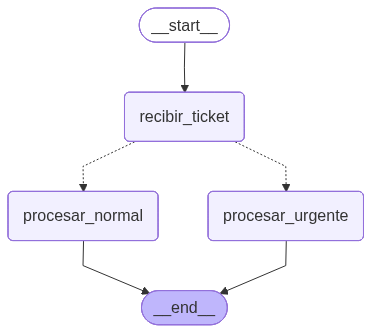


✅ Diagrama generado exitosamente


In [13]:
# 💬 SCRIPT INSTRUCTOR:
# "Veamos cómo se ve nuestro grafo visualmente. Esto nos ayuda a verificar
#  que todas las conexiones estén correctas."

# Visualizar el grafo
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("\n✅ Diagrama generado exitosamente")
except Exception as e:
    print(f"⚠️  No se pudo generar el diagrama: {e}")
    print("   El grafo funciona correctamente, solo la visualización falló.")

---

## 🚀 PASO 5: Ejecutar el Grafo

### Método `invoke()`

El método `invoke()` ejecuta el grafo de forma **síncrona**:
- ✅ Espera a que cada nodo termine antes de continuar
- ✅ Retorna el State final después de llegar a END
- ✅ Útil para debugging y entender el flujo

### 📥 Input Format

El input debe ser un diccionario con los campos del State:

```python
graph.invoke({
    "ticket_id": "TICKET-001",
    "mensaje": "El servidor está caído",
    "prioridad": "",
    "estado": "nuevo",
    "asignado_a": ""
})
```

### 🎬 Vamos a ejecutarlo!

In [14]:
# 💬 SCRIPT INSTRUCTOR:
# "Vamos a ejecutar el grafo con un ticket URGENTE y ver cómo fluye."

print("="*70)
print("🎬 TEST 1: Ticket Urgente")
print("="*70)

input_urgente = {
    "ticket_id": "TICKET-001",
    "mensaje": "El servidor de producción está caído",
    "prioridad": "",
    "estado": "nuevo",
    "asignado_a": ""
}

print(f"\n📥 INPUT:")
print(input_urgente)

# Ejecutar el grafo
resultado_urgente = graph.invoke(input_urgente)

print(f"\n📤 OUTPUT FINAL:")
print(resultado_urgente)
print("\n" + "="*70)

🎬 TEST 1: Ticket Urgente

📥 INPUT:
{'ticket_id': 'TICKET-001', 'mensaje': 'El servidor de producción está caído', 'prioridad': '', 'estado': 'nuevo', 'asignado_a': ''}

📨 NODO 1: Recibiendo ticket TICKET-001
   Mensaje: 'El servidor de producción está caído'

⚠️  ROUTING: Ticket clasificado como URGENTE
   Razón: Contiene palabras clave de urgencia

🚨 NODO 2: Procesando ticket URGENTE TICKET-001
   ⚡ Escalando al equipo de ingeniería...

📤 OUTPUT FINAL:
{'ticket_id': 'TICKET-001', 'mensaje': 'El servidor de producción está caído', 'prioridad': 'urgente', 'estado': 'procesado', 'asignado_a': 'Equipo de Ingeniería'}



In [15]:
# 💬 SCRIPT INSTRUCTOR:
# "Ahora probemos con un ticket NORMAL y comparemos el flujo."

print("="*70)
print("🎬 TEST 2: Ticket Normal")
print("="*70)

input_normal = {
    "ticket_id": "TICKET-002",
    "mensaje": "¿Cómo cambio mi contraseña?",
    "prioridad": "",
    "estado": "nuevo",
    "asignado_a": ""
}

print(f"\n📥 INPUT:")
print(input_normal)

# Ejecutar el grafo
resultado_normal = graph.invoke(input_normal)

print(f"\n📤 OUTPUT FINAL:")
print(resultado_normal)
print("\n" + "="*70)

🎬 TEST 2: Ticket Normal

📥 INPUT:
{'ticket_id': 'TICKET-002', 'mensaje': '¿Cómo cambio mi contraseña?', 'prioridad': '', 'estado': 'nuevo', 'asignado_a': ''}

📨 NODO 1: Recibiendo ticket TICKET-002
   Mensaje: '¿Cómo cambio mi contraseña?'

✅ ROUTING: Ticket clasificado como NORMAL
   Razón: No contiene indicadores de urgencia

📋 NODO 3: Procesando ticket NORMAL TICKET-002
   📌 Agregando a cola de soporte estándar...

📤 OUTPUT FINAL:
{'ticket_id': 'TICKET-002', 'mensaje': '¿Cómo cambio mi contraseña?', 'prioridad': 'normal', 'estado': 'procesado', 'asignado_a': 'Equipo de Soporte L1'}



### 📊 Comparación de Resultados

Observa las diferencias entre los dos tickets:

| Campo | Ticket Urgente | Ticket Normal |
|-------|---------------|---------------|
| **prioridad** | urgente | normal |
| **asignado_a** | Equipo de Ingeniería | Equipo de Soporte L1 |
| **estado** | procesado | procesado |
| **Nodo ejecutado** | procesar_urgente | procesar_normal |

❓ **PREGUNTA:** ¿Notas cómo el Conditional Edge dirigió cada ticket a un nodo diferente?

---

## 🧪 EXPERIMENTO FINAL: ¡Tu Turno!

### Desafío Completo

Crea tus propios tickets y ejecútalos en el grafo:

**Tickets sugeridos:**
1. "Error crítico en el sistema de pagos"
2. "¿Dónde encuentro el manual de usuario?"
3. "La base de datos no responde"
4. "Quiero actualizar mi foto de perfil"
5. "Posible brecha de seguridad detectada"

**Para cada ticket:**
- ✅ Predice: ¿Será urgente o normal?
- ✅ Ejecuta el grafo
- ✅ Verifica: ¿Tu predicción fue correcta?
- ✅ Observa: ¿A qué equipo se asignó?

In [16]:
# 🧪 ESPACIO PARA TUS EXPERIMENTOS
# Crea y ejecuta tus propios tickets aquí

tu_ticket = {
    "ticket_id": "TICKET-XXX",
    "mensaje": "TU MENSAJE AQUÍ",
    "prioridad": "",
    "estado": "nuevo",
    "asignado_a": ""
}

# Ejecutar
# resultado = graph.invoke(tu_ticket)
# print(resultado)

---

## 📚 Recapitulación: ¿Qué Aprendimos?

### ✅ Conceptos Clave

1. **State (Estado)**
   - Es un diccionario compartido entre todos los nodos
   - Definido con `TypedDict` para type safety
   - Viaja a través de todo el grafo
   - Se actualiza por merge (los valores nuevos sobrescriben los viejos)

2. **Nodes (Nodos)**
   - Funciones Python simples
   - Reciben el State como entrada
   - Retornan un diccionario con campos actualizados
   - Hacen el "trabajo" del grafo

3. **Edges (Aristas)**
   - **Normal Edge**: Conexión fija (A → B siempre)
   - **Conditional Edge**: Routing dinámico (A → B o C, según lógica)
   - Definen el flujo de ejecución

4. **StateGraph**
   - Clase principal para construir grafos
   - Se compila antes de ejecutar
   - Se ejecuta con `invoke()`

### 🎯 Patrón de Construcción

```python
# 1. Definir State
class MiState(TypedDict):
    campo1: str
    campo2: int

# 2. Crear nodos
def nodo1(state):
    return {"campo1": "nuevo_valor"}

# 3. Crear conditional edge (si necesario)
def decidir(state) -> Literal["nodo2", "nodo3"]:
    return "nodo2" if condicion else "nodo3"

# 4. Construir grafo
builder = StateGraph(MiState)
builder.add_node("nodo1", nodo1)
builder.add_edge(START, "nodo1")
builder.add_conditional_edges("nodo1", decidir)

# 5. Compilar y ejecutar
graph = builder.compile()
result = graph.invoke({"campo1": "", "campo2": 0})
```

### 🚀 Próximos Pasos

En los siguientes notebooks aprenderás:
- 🤖 Integrar LLMs en los nodos
- 🔧 Usar Tools (herramientas) en agentes
- 🔄 Crear loops y ciclos en grafos
- 💾 Persistir el estado entre ejecuciones
- 🎭 Patrones avanzados de multi-agente

---

## 💡 Preguntas de Reflexión

Antes de continuar, reflexiona sobre estas preguntas:

1. ❓ ¿Qué ventajas tiene usar un grafo en lugar de un simple `if/else`?
2. ❓ ¿Cómo agregarías un tercer nivel de prioridad ("crítico")?
3. ❓ ¿Dónde usarías un sistema similar en tu trabajo?
4. ❓ ¿Qué pasa si un nodo lanza una excepción?
5. ❓ ¿Cómo rastrearías el historial de cambios del State?

---

## 📖 Recursos Adicionales

- [LangGraph Documentation](https://langchain-ai.github.io/langgraph/)
- [StateGraph API Reference](https://langchain-ai.github.io/langgraph/reference/graphs/)
- [More Examples](https://github.com/langchain-ai/langgraph/tree/main/examples)

---

**🎉 ¡Felicitaciones! Completaste tu primer grafo con LangGraph.**

Ahora tienes las bases para construir sistemas multi-agente más complejos.